In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import smopy
import matplotlib.pyplot as plt
from scipy import ndimage

In [9]:
file_path = r'test.csv'
gps = pd.read_csv(file_path)
gps.head()

,segment_ID,trans_mode,former_trans_mode,latitude,longitude,date,time
0,Data\085_20081211234130_bus,bus,None,39.897337,116.343463,2008-12-11,23:41:30
1,Data\085_20081211234130_bus,bus,None,39.898386,116.343125,2008-12-11,23:41:32
2,Data\085_20081211234130_bus,bus,None,39.898262,116.343126,2008-12-11,23:41:34
3,Data\085_20081211234130_bus,bus,None,39.898269,116.343146,2008-12-11,23:41:36
4,Data\085_20081211234130_bus,bus,None,39.898273,116.343155,2008-12-11,23:41:38


In [11]:
x = gps['latitude']
y = gps['longitude']

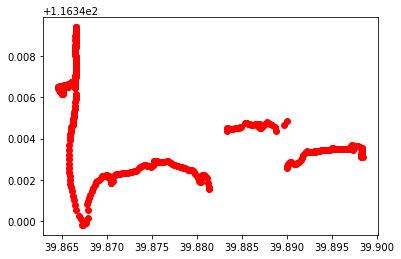

In [12]:
plt.plot(x, y, 'ro')
plt.show()

In [7]:
import datetime as dt

In [14]:
# 计算时间戳
def calc_timestamp(date_time):
    datetime = dt.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S')
    timestamp = datetime - dt.datetime(1970, 1, 1)
    return timestamp.total_seconds()

In [15]:
timestamp = list(map(calc_timestamp, gps['date'] + ' ' + gps['time']))
gps['timestamp'] = timestamp

In [16]:
gps.head()

,segment_ID,trans_mode,former_trans_mode,latitude,longitude,date,time,timestamp
0,Data\085_20081211234130_bus,bus,None,39.897337,116.343463,2008-12-11,23:41:30,1.229039e+09
1,Data\085_20081211234130_bus,bus,None,39.898386,116.343125,2008-12-11,23:41:32,1.229039e+09
2,Data\085_20081211234130_bus,bus,None,39.898262,116.343126,2008-12-11,23:41:34,1.229039e+09
3,Data\085_20081211234130_bus,bus,None,39.898269,116.343146,2008-12-11,23:41:36,1.229039e+09
4,Data\085_20081211234130_bus,bus,None,39.898273,116.343155,2008-12-11,23:41:38,1.229039e+09


In [17]:
all_gps = pd.read_csv('D:\Zhejiang University\Graduate Project\TransMode\Data\segment_master.csv')

In [18]:
all_gps.head()

,segment_ID,trans_mode,latitude,longitude,date,time,former_trans_mode,time_stamp,time_delta,distance_delta,velocity,velocity_ratio,acceleration,acceleration_ratio,bearing_delta,bearing_delta_redirect
0,Data\010_20080328145254_train,train,39.894178,116.318200,2008-03-28,14:54:40,None,1.206716e+09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Data\010_20080328145254_train,train,39.894505,116.321132,2008-03-28,14:55:14,None,1.206716e+09,34.0,253.375122,7.452209,0.000000,0.219183,0.000000,81.728206,0.000000
2,Data\010_20080328145254_train,train,39.894953,116.326452,2008-03-28,14:56:13,None,1.206716e+09,59.0,457.703184,7.757681,0.040991,0.005177,0.976378,83.734582,2.006376
3,Data\010_20080328145254_train,train,39.894600,116.332542,2008-03-28,14:57:12,None,1.206716e+09,59.0,522.318587,8.852857,0.141173,0.018562,2.585198,94.318545,10.583963
4,Data\010_20080328145254_train,train,39.889622,116.337040,2008-03-28,14:58:11,None,1.206716e+09,59.0,673.422397,11.413939,0.289294,0.043408,1.338511,145.266086,50.947541


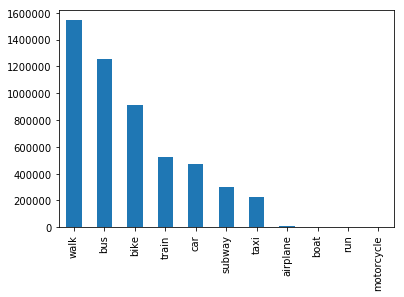

In [19]:
all_gps['trans_mode'].value_counts().plot(kind='bar')

In [25]:
# 剔除train, subway, airplane, boat, run, motorcycle
all_gps = all_gps[all_gps.trans_mode != 'train']
all_gps = all_gps[all_gps.trans_mode != 'subway']
all_gps = all_gps[all_gps.trans_mode != 'airplane']
all_gps = all_gps[all_gps.trans_mode != 'boat']
all_gps = all_gps[all_gps.trans_mode != 'run']
all_gps = all_gps[all_gps.trans_mode != 'motorcycle']

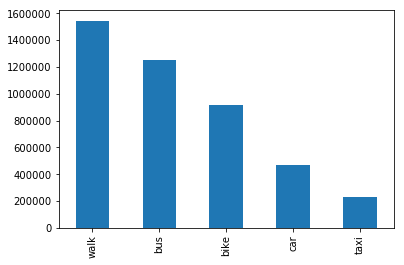

In [26]:
all_gps.trans_mode.value_counts().plot(kind='bar')

In [27]:
print(all_gps.trans_mode.value_counts())

walk    1544340
bus     1251725
bike     913027
car      471072
taxi     228172
Name: trans_mode, dtype: int64


In [59]:
data_walk = all_gps.velocity[all_gps.trans_mode == 'walk']
data_walk = data_walk[data_walk >= 0]
data_walk = data_walk[data_walk <= 2]
data_walk.describe()

count    1.307726e+06
mean     8.233387e-01
std      5.689196e-01
min      0.000000e+00
25%      2.820949e-01
50%      8.183919e-01
75%      1.287398e+00
max      1.999993e+00
Name: velocity, dtype: float64

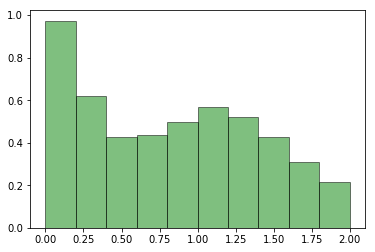

In [79]:
num_bins = 10
n, bins, patches = plt.hist(data_walk, num_bins, normed=1, facecolor='green',edgecolor='black', alpha=0.5)

In [94]:
n, bins = np.histogram(data_walk, normed=1, bins=10)

In [95]:
x = (bins[:bins.size-1] + bins[1:]) / 2 
y = n * (bins[1]-bins[0])

In [96]:
y.sum()

1.0

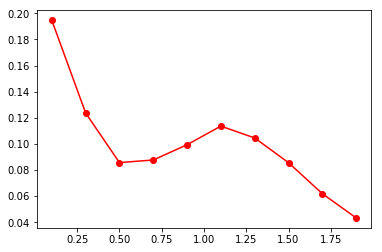

In [97]:
plt.plot(x, y, 'ro-')
plt.show()